In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("Iris.csv")

In [16]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
data.drop("Id", axis=1, inplace=True)

In [15]:
data.drop_duplicates(inplace=True)
data["Species"] = data["Species"].map({"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2})

In [18]:
data["Species"].drop_duplicates()
data = data[data["Species"] != 2]

In [19]:
data.sample(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
62,6.0,2.2,4.0,1.0,1
59,5.2,2.7,3.9,1.4,1
29,4.7,3.2,1.6,0.2,0
30,4.8,3.1,1.6,0.2,0
98,5.1,2.5,3.0,1.1,1
19,5.1,3.8,1.5,0.3,0
54,6.5,2.8,4.6,1.5,1
78,6.0,2.9,4.5,1.5,1
14,5.8,4.0,1.2,0.2,0
68,6.2,2.2,4.5,1.5,1


In [62]:
class LogisticRegression:
    """逻辑回归算法
    """
    
    def __init__(self, alpha, times):
        """初始化方法。
        
        Parameters
        ----
        alpha:float
            学习率.
            
        times:int
            迭代次数。
        """
        self.alpha = alpha
        self.times = times
    
    def sigmoid(self, z):
        """sigmoid函数实现
        
        Parameters
        ----
        z:float 
            自变量
            
        return
        ----
        p:float,值为[0,1]
        """
        return 1.0/(1.0 + np.exp(-z))
    
    def fit(self, X, y):
        """根据数据，对模型进行训练
        
        Parameter
        ——————
        X:待训练的样本特征
        y:样本目标值
        """
        
        X = np.asarray(X)
        y = np.asarray(y)
        self.w_ = np.zeros(1 + X.shape[1])
        self.loss_ = []
        
        for i in range(self.times):
            z = np.dot(X, self.w_[1:]) + self.w_[0]
            # 计算概率值
            p = self.sigmoid(z)
            # 计算损失值
            # J(w) = -sum(yi * log(s(zi)) + (1 - yi) * log(1 - s(zi))) [i从1到n，n为样本的数量]
            cost = -np.sum(y*np.log(p) + (1-y)*np.log(1-p))
            self.loss_.append(cost)
            
            #调整权重值
            self.w_[0] += self.alpha * np.sum(y-p)
            self.w_[1:] += self.alpha * np.dot(X.T, y-p)
            
    def predict_proba(self, X):
        """根据传递的样本，对数据进行预测。
        
        Parameter
        ——————
        X:待预测的样本特征。
        
        Returns
        ——————
        return:预测的结果（概率值）
        """
        
        X = np.asarray(X)
        z = np.dot(X, self.w_[1:]) + self.w_[0]
        p = self.sigmoid(z)
        p = p.reshape(-1,1)
        return np.concatenate([1-p, p], axis=1)
    
    def predict(self, X):
        """根据传递的样本，对数据进行预测。
        
        Parameter
        ——————
        X:待预测的样本特征。
        
        Returns
        ——————
        return:预测的结果（分类值）        
        """
        return np.argmax(self.predict_proba(X), axis=1)

In [63]:
data.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
4,5.0,3.6,1.4,0.2,0
29,4.7,3.2,1.6,0.2,0
72,6.3,2.5,4.9,1.5,1
67,5.8,2.7,4.1,1.0,1
81,5.5,2.4,3.7,1.0,1


In [94]:
t1 = data[data['Species'] == 0]
t2 = data[data['Species'] == 1]
t1 = t1.sample(len(t1), random_state=0)
t2 = t2.sample(len(t2), random_state=0)

train_X = pd.concat([t1.iloc[:40, :-1], t2.iloc[:40, :-1]], axis=0)
train_y = pd.concat([t1.iloc[:40, -1], t2.iloc[:40, -1]], axis=0)
test_X = pd.concat([t1.iloc[40:, :-1], t2.iloc[40:, :-1]], axis=0)
test_y = pd.concat([t1.iloc[40:, -1], t2.iloc[40:, -1]], axis=0)

lr = LogisticRegression(alpha=0.01, times=10)
lr.fit(train_X, train_y)
#预测概率值
lr.predict_proba(test_X)

array([[0.98856022, 0.01143978],
       [0.9912855 , 0.0087145 ],
       [0.97547319, 0.02452681],
       [0.92146873, 0.07853127],
       [0.97955256, 0.02044744],
       [0.96906706, 0.03093294],
       [0.98998123, 0.01001877],
       [0.98989082, 0.01010918],
       [0.00530629, 0.99469371],
       [0.01813958, 0.98186042],
       [0.0141315 , 0.9858685 ],
       [0.01206707, 0.98793293],
       [0.00849882, 0.99150118],
       [0.01085314, 0.98914686],
       [0.00608731, 0.99391269],
       [0.00794825, 0.99205175],
       [0.01046418, 0.98953582],
       [0.00744684, 0.99255316]])

In [90]:
result = lr.predict(test_X)

In [91]:
np.sum(result == test_y) / len(test_y)

1.0

# 回归结果可视化

In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt



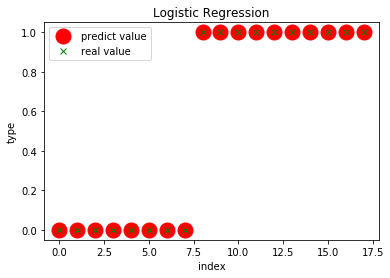

In [92]:
plt.plot(result, "ro", ms=15, label="predict value")
plt.plot(test_y.values, "gx", label="real value")
plt.title("Logistic Regression")
plt.xlabel("index")
plt.ylabel("type")
plt.legend()
plt.show()

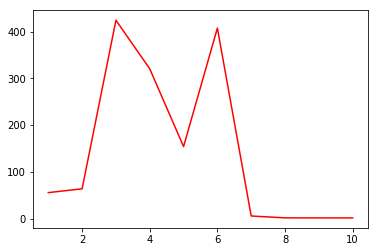

In [95]:
#绘制目标函数损失值
plt.plot(range(1,lr.times+1), lr.loss_, "r-")

# 乳腺癌数据

In [98]:
data = pd.read_csv("cancer.csv")

In [100]:
data.shape

(569, 31)

In [101]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [103]:
data.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,type
549,10.820,24.21,68.89,361.6,0.08192,0.06602,0.01548,0.00816,0.1976,0.06328,...,31.45,83.90,505.6,0.1204,0.16330,0.06194,0.03264,0.3059,0.07626,1
314,8.597,18.60,54.09,221.2,0.10740,0.05847,0.00000,0.00000,0.2163,0.07359,...,22.44,56.65,240.1,0.1347,0.07767,0.00000,0.00000,0.3142,0.08116,1
369,22.010,21.90,147.20,1482.0,0.10630,0.19540,0.24480,0.15010,0.1824,0.06140,...,25.80,195.00,2227.0,0.1294,0.38850,0.47560,0.24320,0.2741,0.08574,0
439,14.020,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,0.05586,...,19.31,96.53,688.9,0.1034,0.10170,0.06260,0.08216,0.2136,0.06710,1
547,10.260,16.58,65.85,320.8,0.08877,0.08066,0.04358,0.02438,0.1669,0.06714,...,22.04,71.08,357.4,0.1461,0.22460,0.17830,0.08333,0.2691,0.09479,1


In [102]:
data["type"].drop_duplicates()

0     0
19    1
Name: type, dtype: int64